In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors

import pandas as pd
import xarray as xr
from netCDF4 import Dataset, num2date, date2num
from datetime import datetime, timedelta
import os

import seaborn as sns
import cmocean as cmocn

%matplotlib inline

In [2]:
removeData = [{'loc': [-8, -180],
              'startDate': datetime(2009, 7, 1),
              'endDate':   datetime(2009, 12, 1)},
              
              {'loc': [-2, 165],
              'startDate': datetime(2007, 10, 1),
              'endDate':   datetime(2008, 4, 1)},
              
              {'loc': [-2, -95],
              'startDate': datetime(2005, 5, 1),
              'endDate':   datetime(2005, 8, 1)},
              
              {'loc': [2, -155],
              'startDate': datetime(2009, 5, 1),
              'endDate':   datetime(2009, 12, 1)},
              
              {'loc': [0, -140],
              'startDate': datetime(2009, 9, 1),
              'endDate':   datetime(2010, 1, 1)},
              
              {'loc': [2, -110],
              'startDate': datetime(2000, 4, 1),
              'endDate':   datetime(2000, 10, 1)},
              
              {'loc': [0, -110],
              'startDate': datetime(2001, 10, 1),
              'endDate':   datetime(2002, 1, 1)},
              
              {'loc': [-5, -110],
              'startDate': datetime(2006, 3, 1),
              'endDate':   datetime(2006, 5, 1)}]

remove_df = pd.DataFrame(removeData)

remove_df

,loc,startDate,endDate
0,"[-8, -180]",2009-07-01,2009-12-01
1,"[-2, 165]",2007-10-01,2008-04-01
2,"[-2, -95]",2005-05-01,2005-08-01
3,"[2, -155]",2009-05-01,2009-12-01
4,"[0, -140]",2009-09-01,2010-01-01
5,"[2, -110]",2000-04-01,2000-10-01
6,"[0, -110]",2001-10-01,2002-01-01
7,"[-5, -110]",2006-03-01,2006-05-01


In [3]:
# ds= xr.open_dataset('/srv/data2/srai_poseidon/srai_poseidon/observation/SatelliteVsBuoy/downloads/Buoy/extractedGZ/WINDS/T_09N_140W_xrr_MatchUp_720_mins_2000.nc')
# ds

In [4]:
fld = '/srv/data2/srai_poseidon/srai_poseidon/observation/SatelliteVsBuoy/downloads/Buoy/TAO_data/WINDS/'
ds = xr.open_dataset(fld + '/T_008S_095W_COARE3p5_1999_2009_2hrMeanVar_QS_Buoy_fz_zonal_Glorys_Wave_Matchup.nc')
                     #T_009N_140W_COARE3p5_1999_2009_2hrMeanVar_QS_Matchup.nc')
#ds = xr.open_dataset(fld + 'T_005S_140W_COARE3p5_1999_2009_2hrMeanVar_QS_Matchup.nc')
ds

<xarray.Dataset>
Dimensions:                           (QS_TIME: 6873, cross_track: 3,
                                       ambiguities: 4, HEIGHT: 3, DEPTH: 1)
Coordinates:
  * QS_TIME                           (QS_TIME) datetime64[ns] 1999-11-24T12:...
  * cross_track                       (cross_track) int64 0 1 2
  * ambiguities                       (ambiguities) int64 0 1 2 3
  * HEIGHT                            (HEIGHT) float32 3.0 4.0 10.0
  * DEPTH                             (DEPTH) float32 1.0
Data variables: (12/103)
    retrieved_wind_speed              (QS_TIME, cross_track) float64 ...
    retrieved_wind_direction          (QS_TIME, cross_track) float64 ...
    rain_impact                       (QS_TIME, cross_track) float64 ...
    flags                             (QS_TIME, cross_track) float64 ...
    eflags                            (QS_TIME, cross_track) float64 ...
    nudge_wind_speed                  (QS_TIME, cross_track) float64 ...
    ...                                ...
    vo                                (QS_TIME) float32 ...
    zos                               (QS_TIME) float32 ...
    uo                                (QS_TIME) float32 ...
    thetao                            (QS_TIME) float32 ...
    so                                (QS_TIME) float32 ...
    GLORYS_TIME                       (QS_TIME) datetime64[ns] ...

In [5]:
print(list(np.unique(ds.WSPD_QC.sel(HEIGHT=4).to_numpy())))
print(list(np.unique(ds.WDIR_QC.sel(HEIGHT=4).to_numpy())))
print(list(np.unique(ds.SST_QC.to_numpy())))
print(list(np.unique(ds.RELH_QC.to_numpy())))
print(list(np.unique(ds.AIRT_QC.to_numpy())))                                                                                                                                                                                          

[2.0]
[2.0]
[2.0]
[2.0, nan]
[2.0, nan]


In [6]:
list(ds.variables.keys())

['QS_TIME',
 'cross_track',
 'retrieved_wind_speed',
 'retrieved_wind_direction',
 'rain_impact',
 'flags',
 'eflags',
 'nudge_wind_speed',
 'nudge_wind_direction',
 'retrieved_wind_speed_uncorrected',
 'cross_track_wind_speed_bias',
 'atmospheric_speed_bias',
 'wind_obj',
 'ambiguities',
 'ambiguity_speed',
 'ambiguity_direction',
 'ambiguity_obj',
 'number_in_fore',
 'number_in_aft',
 'number_out_fore',
 'number_out_aft',
 'gmf_sst',
 'distance_from_coast',
 'exp_bias_wrt_oceanward_neighbors',
 'dist_from_TAO_pos',
 'HEIGHT',
 'DEPTH',
 'WDIR',
 'WDIR_QC',
 'WDIR_DM',
 'WSPD',
 'WSPD_QC',
 'WSPD_DM',
 'UWND',
 'VWND',
 'SST',
 'SST_QC',
 'SST_DM',
 'AIRT',
 'AIRT_QC',
 'AIRT_DM',
 'RELH',
 'RELH_QC',
 'RELH_DM',
 'WSPD_10N',
 'WSPD_10',
 'SST - AIRT',
 'cosWDIR',
 'sinWDIR',
 'U10N_x',
 'U10N_y',
 'mean_WSPD',
 'std_WSPD',
 'mean_WDIR',
 'std_WDIR',
 'mean_cosWDIR',
 'std_cosWDIR',
 'mean_sinWDIR',
 'std_sinWDIR',
 'mean_WSPD_10N',
 'std_WSPD_10N',
 'mean_U10N_x',
 'std_U10N_x',
 'me

In [7]:
def getSubDF(ds, LAT, LON, remove_df):
    if [LAT, LON] in remove_df['loc'].tolist():
        print(f'MANUAL REMOVAL OF DATA IN LOC {LAT} {LON}')
        # Find index of matching location
        rindx = remove_df.index[remove_df['loc'].apply(lambda x: x == [LAT, LON])].tolist()[0]
        
        # Convert start and end dates to datetime64
        startDate = np.array(remove_df.loc[rindx, 'startDate'], dtype='datetime64[ns]')
        endDate = np.array(remove_df.loc[rindx, 'endDate'], dtype='datetime64[ns]')
        
        # Get time array from dataset
        dates = ds['QS_TIME'].to_numpy()
        
        # Create Boolean mask for time range
        mask = (dates >= startDate) & (dates < endDate)
        
        # Drop data within that time range
        ds = ds.sel(QS_TIME=~mask)

    LON = (LON+360)%360
        
    subds = xr.Dataset()

    taoTimeVar = ['TAO_TIME']
    
    windVars = ['WDIR',
         'WDIR_QC',
         'WDIR_DM',
         'WSPD',
         'WSPD_QC',
         'WSPD_DM',
         'UWND',
         'VWND']

    sstVars = ['SST',
             'SST_QC',
             'SST_DM']
    
    airtVars = ['AIRT',
             'AIRT_QC',
             'AIRT_DM']
    
    rhVars = ['RELH',
             'RELH_QC',
             'RELH_DM']
    
    u10Vars =['WSPD_10N',
             'WSPD_10']

    statVars= [f'mean_WSPD',
               f'std_WSPD',
               f'mean_WSPD_10N',
               f'std_WSPD_10N',
               f'mean_U10N_x',
               f'std_U10N_x',
               f'mean_U10N_y',
               f'std_U10N_y',
               f'mean_WDIR',
               f'std_WDIR',
               f'mean_cosWDIR',
               f'std_cosWDIR',
               f'mean_sinWDIR',
               f'std_sinWDIR',
               f'mean_SST',
               f'std_SST',
               f'mean_AIRT',
               f'std_AIRT',
               f'mean_SST - AIRT',
               f'std_SST - AIRT',
               f'mean_RELH',
               f'std_RELH',
               'fz_mean_WSPD_10N',
               'fz_mean_UWND_10N',
               'fz_mean_VWND_10N',
               'fz_mean_WDIR',
               'fz_std_WSPD_10N',
               'fz_std_cosWDIR',
               'fz_std_sinWDIR',
               'fz_integrationTime']
    
    
    satVars = ['retrieved_wind_speed',
             'retrieved_wind_direction',
             'rain_impact',
             'flags',
             'eflags',
             'nudge_wind_speed',
             'nudge_wind_direction',
             'retrieved_wind_speed_uncorrected',
             'cross_track_wind_speed_bias',
             'atmospheric_speed_bias',
             'wind_obj',
             'number_in_fore',
             'number_in_aft',
             'number_out_fore',
             'number_out_aft',
             'gmf_sst',
             'distance_from_coast',
             'exp_bias_wrt_oceanward_neighbors']

    satAmbVars =['ambiguity_obj',
                 'ambiguity_speed',
                 'ambiguity_direction']

    waveVars = ['VHM0',
                 'VHM0_SW1',
                 'VHM0_SW2',
                 'VHM0_WW',
                 'VMDR',
                 'VMDR_SW1',
                 'VMDR_SW2',
                 'VMDR_WW',
                 'VPED',
                 'VSDX',
                 'VSDY',
                 'VTM01_SW1',
                 'VTM01_SW2',
                 'VTM01_WW',
                 'VTM02',
                 'VTM10',
                 'VTPK',
                 'WAVE_TIME']

    oceanVars = ['vo',
                 'zos',
                 'uo',
                 'thetao',
                 'so',
                 'GLORYS_TIME']

     
    
    for windVar in windVars:
        subds[windVar] = ds[windVar].sel(HEIGHT=4)
    subds.drop_vars('HEIGHT')
    for sstVar in sstVars:
        subds[sstVar] = ds[sstVar].sel(DEPTH=1)
    subds.drop_vars('DEPTH')
    for rhVar in rhVars:
        subds[rhVar] = ds[rhVar].sel(HEIGHT=3)
    subds.drop_vars('HEIGHT')
    for airtVar in airtVars:
        subds[airtVar] = ds[airtVar].sel(HEIGHT=3)
    subds.drop_vars('HEIGHT')
    for u10Var in u10Vars:
        subds[u10Var] = ds[u10Var].sel(HEIGHT=10)
    subds.drop_vars('HEIGHT')


    for var in waveVars:
        subds[var] = ds[var]

    for var in oceanVars:
        subds[var] = ds[var]

    for statVar in statVars:
        subds[statVar] = ds[statVar]

    subds['LATITUDE'] = xr.DataArray(LAT * np.ones(len(subds['QS_TIME']), dtype = float), dims=['QS_TIME'])
    subds['LONGITUDE'] = xr.DataArray(LON * np.ones(len(subds['QS_TIME']), dtype = float), dims=['QS_TIME'])
    
    subds['TAO_TIME'] = ds['TAO_TIME_at_QS_TIME']

    deployFileName = f'/srv/data2/srai_poseidon/srai_poseidon/observation/SatelliteVsBuoy/downloads/Buoy/TAO_data/WINDS/T_{lat:03d}{latUnits}_{lon:03d}{lonUnits}/T_{lat:03d}{latUnits}_{lon:03d}{lonUnits}_DeploymentDates.nc'
    ds2 = xr.open_dataset(deployFileName)
    startDates = np.array(ds2['startDate'])
    endDates = np.array(ds2['endDate'])

    depNum = np.zeros((len(subds['QS_TIME'])), dtype=int)
    c = 1
    for i in range(1,len(startDates)):
        mask = subds['QS_TIME'] >= startDates[i]
        mask *= subds['QS_TIME'] <= endDates[i]
        depNum[mask] = c
        c = c+1

    subds['Deployment index'] = xr.DataArray(depNum, dims=['QS_TIME'])
    
    satDS = ds[satVars]
    satDS = satDS.isel(cross_track=0)

    amb_speed = ds['ambiguity_speed'].isel(cross_track=0).to_numpy()
    num_amb_speed = np.sum(np.isnan(amb_speed), axis = 1)
    subds['num_ambiguities_speed'] = xr.DataArray(num_amb_speed, dims=['QS_TIME'])

    amb_direction = ds['ambiguity_direction'].isel(cross_track=0).to_numpy()
    num_amb_direction = np.sum(np.isnan(amb_direction), axis = 1)
    subds['num_ambiguities_direction'] = xr.DataArray(num_amb_direction, dims=['QS_TIME'])

    
    sat0DS = ds[satAmbVars].isel(cross_track=0, ambiguities=0).drop_vars(['ambiguities'])
    sat0DS = sat0DS.rename_vars({'ambiguity_speed': 'ambiguity_speed_0',
                                 'ambiguity_direction': 'ambiguity_direction_0', 
                                 'ambiguity_obj': 'ambiguity_obj_0'})

    sat1DS = ds[satAmbVars].isel(cross_track=0, ambiguities=1).drop_vars(['ambiguities'])
    sat1DS = sat1DS.rename_vars({'ambiguity_speed': 'ambiguity_speed_1',
                        'ambiguity_direction': 'ambiguity_direction_1', 
                                 'ambiguity_obj': 'ambiguity_obj_1'})

    sat2DS = ds[satAmbVars].isel(cross_track=0, ambiguities=2).drop_vars(['ambiguities'])
    sat2DS = sat2DS.rename_vars({'ambiguity_speed': 'ambiguity_speed_2',
                        'ambiguity_direction': 'ambiguity_direction_2', 
                                 'ambiguity_obj': 'ambiguity_obj_2'})

    sat3DS = ds[satAmbVars].isel(cross_track=0, ambiguities=3).drop_vars(['ambiguities'])
    sat3DS = sat3DS.rename_vars({'ambiguity_speed': 'ambiguity_speed_3',
                        'ambiguity_direction': 'ambiguity_direction_3', 
                                 'ambiguity_obj': 'ambiguity_obj_3'})
    returnDS = xr.merge((subds, satDS, sat0DS, sat1DS, sat2DS, sat3DS))

    
    
    return returnDS

In [8]:
latList = [-9, -8, -5, -2, 0, 2, 5, 8, 9]
lonList = [-95, -110, -125, -140, -155, -170, -180, 165]

ylen = len(latList)
xlen = len(lonList)

taskList = []

for latId  in range(ylen):
    for lonId in range(xlen):
        taskList.append([latList[latId], lonList[lonId]])

ntasks = len(taskList)


allDS = xr.Dataset()
dataCount = 0
fileCount = 0
for task in taskList:
    lat = task[0]
    lon = task[1]

    LAT = lat
    LON = lon

    if lat < 0:
        latUnits = 'S'
    else:
        latUnits = 'N'

    if lon < 0:
        lonUnits = 'W'
    else:
        lonUnits = 'E'

    #LON = (LON+360)%360
    lat=abs(lat)
    lon=abs(lon)

    matchFname = f'/srv/data2/srai_poseidon/srai_poseidon/observation/SatelliteVsBuoy/downloads/Buoy/TAO_data/WINDS/T_{lat:03d}{latUnits}_{lon:03d}{lonUnits}_COARE3p5_1999_2009_2hrMeanVar_QS_Buoy_fz_zonal_Glorys_Wave_Matchup.nc'
    #deployFileName = f'../../downloads/Buoy/extractedGZ/WINDS/T_{lat:02d}{latUnits}_{lon:03d}{lonUnits}/T_{lat:02d}{latUnits}_{lon:03d}{lonUnits}_DeploymentDates.nc'
    
    if os.path.isfile(matchFname):
        print(f'T_{lat:03d}{latUnits}_{lon:03d}{lonUnits}')
        rds = xr.open_dataset(matchFname)
        ds = getSubDF(rds, LAT, LON, remove_df)
        QS_TIME = ds['QS_TIME'].to_numpy()
        ds = ds.rename({'QS_TIME':'count'})
        dataLen = len(ds['count'])
        print(dataCount, dataCount+dataLen)
        ds['count'] = xr.DataArray(pd.Series(np.arange(dataCount, dataCount+dataLen)), 
                                   dims = ['count'])
        ds['QS_TIME'] = xr.DataArray(QS_TIME, 
                                   dims = ['count'])
        dataCount += dataLen
        if fileCount == 0:
            allDS = ds
        else:
            allDS = xr.concat((allDS, ds), dim='count')
        fileCount += 1
        

T_008S_095W
0 6873
T_008S_110W
6873 10793


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_008S_125W
10793 16169


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_008S_155W
16169 21215


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_008S_170W
21215 27563


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_008S_180W
MANUAL REMOVAL OF DATA IN LOC -8 -180
27563 32702


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_008S_165E
32702 37291


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_005S_095W
37291 42358


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_005S_110W
MANUAL REMOVAL OF DATA IN LOC -5 -110
42358 47552


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_005S_125W
47552 54387


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_005S_140W
54387 61780


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_005S_155W
61780 65535


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_005S_170W
65535 69656


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_005S_180W
69656 75582


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_005S_165E
75582 83083


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_002S_095W
MANUAL REMOVAL OF DATA IN LOC -2 -95
83083 84360


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_002S_110W
84360 87042


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_002S_125W
87042 94413


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_002S_140W
94413 100951


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_002S_155W
100951 106466


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_002S_170W
106466 110871


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_002S_180W
110871 118446


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_002S_165E
MANUAL REMOVAL OF DATA IN LOC -2 165
118446 121408


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_000N_095W
121408 124790


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_000N_110W
MANUAL REMOVAL OF DATA IN LOC 0 -110
124790 129058


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_000N_125W
129058 134604


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_000N_140W
MANUAL REMOVAL OF DATA IN LOC 0 -140
134604 142412


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_000N_155W
142412 149967


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_000N_170W
149967 156333


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_000N_180W
156333 161034


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_000N_165E
161034 164518


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_002N_095W
164518 167845


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_002N_110W
MANUAL REMOVAL OF DATA IN LOC 2 -110
167845 172286


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_002N_125W
172286 176083


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_002N_140W
176083 183764


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_002N_155W
MANUAL REMOVAL OF DATA IN LOC 2 -155
183764 190899


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_002N_170W
190899 195141


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_002N_180W
195141 200622


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_002N_165E
200622 204633


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_005N_095W
204633 209235


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_005N_110W
209235 216220


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_005N_125W
216220 220392


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_005N_140W
220392 228128


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_005N_155W
228128 232137


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_005N_170W
232137 236892


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_005N_180W
236892 243368


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_005N_165E
243368 249187


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_008N_095W
249187 253221


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_008N_110W
253221 259748


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_008N_125W
259748 262118


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_008N_155W
262118 268762


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_008N_170W
268762 275897


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_008N_180W
275897 281017


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_008N_165E
281017 288052


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

T_009N_140W
288052 295515


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/pytho

In [9]:
allDS = allDS.drop_vars(['HEIGHT','DEPTH','cross_track'])

In [10]:
allDS

<xarray.Dataset>
Dimensions:                           (count: 295515)
Coordinates:
  * count                             (count) int64 0 1 2 ... 295513 295514
Data variables: (12/110)
    WDIR                              (count) float32 140.6 129.4 ... 227.3
    WDIR_QC                           (count) float32 2.0 2.0 2.0 ... 2.0 2.0
    WDIR_DM                           (count) |S1 b'D' b'D' b'D' ... b'D' b'D'
    WSPD                              (count) float32 6.79 5.46 ... 1.63 1.47
    WSPD_QC                           (count) float32 2.0 2.0 2.0 ... 2.0 2.0
    WSPD_DM                           (count) |S1 b'D' b'D' b'D' ... b'D' b'D'
    ...                                ...
    ambiguity_speed_2                 (count) float64 nan 10.65 ... 2.363 2.075
    ambiguity_direction_2             (count) float64 nan 244.5 ... 242.6 259.7
    ambiguity_obj_3                   (count) float64 nan nan nan ... -9.501 nan
    ambiguity_speed_3                 (count) float64 nan nan nan ... 1.75 nan
    ambiguity_direction_3             (count) float64 nan nan nan ... 307.0 nan
    QS_TIME                           (count) datetime64[ns] 1999-11-24T12:19...

In [11]:
flag_meanings = allDS.flags.flag_meanings.strip().split(' ')
flag_vals = np.array( [ val.strip().rstrip('s') for val in allDS.flags.flag_masks.split(',')], dtype=int)
significant_bit = np.log2(flag_vals)
position_from_left = 15- significant_bit

for i,j in zip(position_from_left, flag_meanings):
    print(f'{i:3.0f} {j}')


 15 adequate_sigma0_flag
 14 adequate_azimuth_diversity_flag
 10 poor_coastal_processing_flag
  9 wind_retrieval_likely_corrupted_flag
  8 coastal_flag
  7 ice_edge_flag
  6 winds_not_retrieved_flag
  5 high_wind_speed_flag
  4 low_wind_speed_flag
  3 rain_impact_flag_not_usable_flag
  2 rain_impact_flag
  1 missing_look_flag


In [12]:
eflag_meanings = allDS.eflags.flag_meanings.strip().split(' ')
eflag_vals = np.array( [ val.strip().rstrip('s') for val in allDS.eflags.flag_masks.split(',')], dtype=int)
significant_bit = np.log2(eflag_vals)
position_from_left = 15- significant_bit

for i,j in zip(position_from_left, eflag_meanings):
    print(f'{i:3.0f} {j}')

 15 rain_correction_not_applied_flag
 14 correction_produced_negative_spd_flag
 13 all_ambiguities_contribute_to_nudging_flag
 12 large_rain_correction_flag
 11 coastal_processing_applied_flag
  9 lake_winds_flag
  7 rain_nearby_flag
  6 ice_nearby_flag
  5 significant_rain_correction_flag
  4 rain_correction_applied_flag
  3 wind_retrieval_possibly_corrupted_flag


In [13]:
eflags_dummy = allDS['eflags'].to_numpy()
eflags_dummy[np.isnan(eflags_dummy)] = 0
extended_flags = np.array(eflags_dummy, dtype=int)
eflags = np.array(['{:016b}'.format(val) for val in extended_flags])

flags_dummy = allDS['eflags'].to_numpy()
flags_dummy[np.isnan(eflags_dummy)] = 0
flags = np.array(flags_dummy, dtype=int)
flags = np.array(['{:016b}'.format(val) for val in flags])

rain_impact_flag_not_usable_flag = np.array([val[3] == '1' for val in flags])
rain_impact_flag = np.array([val[2] == '1' for val in flags])
rainCorrectionApplied = np.array([val[4] == '1' for val in eflags])
significantRainCorrectionApplied = np.array([val[5] == '1' for val in eflags])
largeRainCorrectionApplied = np.array([val[12] == '1' for val in eflags])

rainMask = np.logical_or(rainCorrectionApplied, significantRainCorrectionApplied)
rainMask = np.logical_or(rainMask, largeRainCorrectionApplied)
rainmask = np.logical_or(rainMask, rain_impact_flag)
rainmask = np.logical_or(rainMask, rain_impact_flag_not_usable_flag)
allDS['rainFlag'] = xr.DataArray(np.array(rainMask, dtype=int), dims=['count'])

In [14]:
np.unique(allDS['eflags'].to_numpy())

array([0.000e+00, 1.000e+00, 5.000e+00, 2.100e+01, 2.052e+03, 4.097e+03,
       4.101e+03, 4.117e+03, 4.119e+03, 4.353e+03, 4.357e+03, 4.373e+03,
       4.375e+03, 6.404e+03, 7.172e+03, 7.180e+03, 7.182e+03, 7.428e+03,
       7.436e+03, 7.438e+03])

In [15]:
noRainMask = ~rainMask
mask1 = allDS['WSPD_QC'].isin([1,2]).to_numpy()
mask2 = allDS['WDIR_QC'].isin([1,2]).to_numpy()
mask3 = allDS['SST_QC'].isin([1,2]).to_numpy()
mask4 = allDS['RELH_QC'].isin([1,2]).to_numpy()
mask5 = allDS['AIRT_QC'].isin([1,2]).to_numpy()

In [16]:
selectMask = np.logical_and(noRainMask, mask1)
selectMask = np.logical_and(selectMask, mask2)
selectMask = np.logical_and(selectMask, mask3)
selectMask = np.logical_and(selectMask, mask4)
selectMask = np.logical_and(selectMask, mask5)

In [17]:
indices = selectMask.nonzero()[0]
goodDataSet = allDS.sel(count=indices)

In [18]:
varList = list(goodDataSet.variables.keys())
varList = ['WSPD', 'WDIR', 'SST', 'RELH', 'AIRT',
           'mean_WSPD', 'mean_WDIR', 'mean_SST', 'mean_RELH', 'mean_AIRT', 'mean_SST - AIRT',
           'std_WSPD', 'std_WDIR', 'std_SST', 'std_RELH', 'std_AIRT', 'std_SST - AIRT',
           'std_cosWDIR', 'std_sinWDIR',
           'std_U10N_x','std_U10N_y',
           'retrieved_wind_speed', 'retrieved_wind_direction',
           'fz_mean_WSPD_10N',
               'fz_mean_UWND_10N',
               'fz_mean_VWND_10N',
               'fz_mean_WDIR',
               'fz_std_WSPD_10N',
               'fz_std_cosWDIR',
               'fz_std_sinWDIR',
               'fz_integrationTime']

var = varList[0]
mask = np.isnan(goodDataSet[var].to_numpy())
print(var, np.sum(mask))

for var in varList[1::]:
    old = np.sum(mask)
    mask = np.logical_or(mask, np.isnan(goodDataSet[var].to_numpy()))
    print(var, np.sum(mask) - old)

print('total', np.sum(mask))



df = goodDataSet.isel(count = ~mask)
len(df['count'].values)
#df = df.to_dataframe()

WSPD 0
WDIR 0
SST 0
RELH 0
AIRT 0
mean_WSPD 972
mean_WDIR 0
mean_SST 0
mean_RELH 0
mean_AIRT 0
mean_SST - AIRT 0
std_WSPD 0
std_WDIR 0
std_SST 2115
std_RELH 9
std_AIRT 0
std_SST - AIRT 0
std_cosWDIR 6
std_sinWDIR 0
std_U10N_x 0
std_U10N_y 0
retrieved_wind_speed 17534
retrieved_wind_direction 0
fz_mean_WSPD_10N 0
fz_mean_UWND_10N 0
fz_mean_VWND_10N 0
fz_mean_WDIR 0
fz_std_WSPD_10N 0
fz_std_cosWDIR 0
fz_std_sinWDIR 0
fz_integrationTime 0
total 20636


264416

In [19]:
goodDataSet = goodDataSet.rename_vars({'WSPD':'WSPD (TAO)',
                  'WDIR':'WDIR (TAO)',
                  'UWND': 'UWND (TAO)',
                  'VWND': 'VWND (TAO)',
                  'SST': 'SST (TAO)',
                  'RELH': 'RELH (TAO)',
                  'AIRT': 'AIRT (TAO)',
                  'WSPD_10N': 'WSPD_10N (TAO)',
                  'WSPD_10': 'WSPD_10 (TAO)',
                  'retrieved_wind_speed': 'WSPD_10N (QuikSCAT)',
                  'retrieved_wind_direction': 'WDIR (QuikSCAT)',
                  'mean_U10N_x': 'mean_UWND_10N', 
                  'mean_U10N_y': 'mean_VWND_10N',
                  'std_U10N_x': 'std_UWND_10N', 
                  'std_U10N_y': 'std_VWND_10N',
                  'fz_mean_WSPD_10N': 'WSPD_10N_FZ (TAO)',
                  'fz_mean_UWND_10N': 'UWND_10N_FZ',
                  'fz_mean_VWND_10N': 'VWND_10N_FZ',
                  'fz_mean_WDIR': 'WDIR_FZ (TAO)'})

In [20]:
df = df.rename_vars({'WSPD':'WSPD (TAO)',
                  'WDIR':'WDIR (TAO)',
                  'UWND': 'UWND (TAO)',
                  'VWND': 'VWND (TAO)',
                  'SST': 'SST (TAO)',
                  'RELH': 'RELH (TAO)',
                  'AIRT': 'AIRT (TAO)',
                  'WSPD_10N': 'WSPD_10N (TAO)',
                  'WSPD_10': 'WSPD_10 (TAO)',
                  'retrieved_wind_speed': 'WSPD_10N (QuikSCAT)',
                  'retrieved_wind_direction': 'WDIR (QuikSCAT)',
                  'mean_U10N_x': 'mean_UWND_10N', 
                  'mean_U10N_y': 'mean_VWND_10N',
                  'std_U10N_x': 'std_UWND_10N', 
                  'std_U10N_y': 'std_VWND_10N',
                  'fz_mean_WSPD_10N': 'WSPD_10N_FZ (TAO)',
                  'fz_mean_UWND_10N': 'UWND_10N_FZ',
                  'fz_mean_VWND_10N': 'VWND_10N_FZ',
                  'fz_mean_WDIR': 'WDIR_FZ (TAO)'})

In [21]:
df['WSPD_DIFF (QuikSCAT - TAO)'] = df['WSPD_10N (QuikSCAT)'] - df['WSPD_10N (TAO)']

## change true degrees to degrees where 0 deg mean_east and 90 deg mean_north 
#df['WDIR (TAO)'] = (-(df['WDIR (TAO)'] - 90.0) + 360)%360
df['WDIR (QuikSCAT)'] = (-(df['WDIR (QuikSCAT)'] - 90.0) + 360)%360

## calculate zonal and meridional winds 
df['UWND_10N (TAO)'] = df['WSPD_10N (TAO)'] * np.cos(np.deg2rad(df['WDIR (TAO)']))
df['VWND_10N (TAO)'] = df['WSPD_10N (TAO)'] * np.sin(np.deg2rad(df['WDIR (TAO)']))

df['UWND_10N (QuikSCAT)'] = df['WSPD_10N (QuikSCAT)'] * np.cos(np.deg2rad(df['WDIR (QuikSCAT)']))
df['VWND_10N (QuikSCAT)'] = df['WSPD_10N (QuikSCAT)'] * np.sin(np.deg2rad(df['WDIR (QuikSCAT)']))

#### Speed and direction QS corrected to absolute using GLORYS
df['UWND (QuikSCAT) absolute'] = df['UWND_10N (QuikSCAT)'] + df['uo']
df['VWND (QuikSCAT) absolute'] = df['VWND_10N (QuikSCAT)'] + df['vo']

absolute_direction_QS = np.rad2deg(np.arctan2(df['VWND (QuikSCAT) absolute'],
                                              df['UWND (QuikSCAT) absolute']))

absolute_direction_QS = (absolute_direction_QS+360)%360

df['WDIR (QuikSCAT) absolute'] = absolute_direction_QS

## direction diff in range (-180,180)
dirDiff = ((df['WDIR (QuikSCAT)'] - df['WDIR (TAO)'])+360)%360
dirDiff = xr.where(dirDiff > 180, dirDiff-360, dirDiff)
df['WDIR_DIFF (QuikSCAT - TAO)'] = dirDiff
df['cos(WDIR_DIFF (QuikSCAT - TAO))'] = np.cos(np.deg2rad(dirDiff))
df['sin(WDIR_DIFF (QuikSCAT - TAO))'] = np.sin(np.deg2rad(dirDiff))



## direction diff in range (-180,180) with absolute
dirDiff = ((df['WDIR (QuikSCAT) absolute'] - df['WDIR (TAO)'])+360)%360
dirDiff = xr.where(dirDiff > 180, dirDiff-360, dirDiff)
df['WDIR_DIFF (QuikSCAT - TAO) absolute'] = dirDiff
df['cos(WDIR_DIFF (QuikSCAT - TAO)) absolute'] = np.cos(np.deg2rad(dirDiff))
df['sin(WDIR_DIFF (QuikSCAT - TAO)) absolute'] = np.sin(np.deg2rad(dirDiff))

df['UWND_DIFF (QuikSCAT - TAO) absolute'] = df['UWND (QuikSCAT) absolute'] - df['UWND_10N (TAO)']

df['VWND_DIFF (QuikSCAT - TAO) absolute'] = df['VWND (QuikSCAT) absolute'] - df['VWND_10N (TAO)']



################### FROZEN FLOW ##############
################### FROZEN FLOW ##############

df['WSPD_DIFF_FZ (QuikSCAT - TAO)'] = df['WSPD_10N (QuikSCAT)'] - df['WSPD_10N_FZ (TAO)']
## direction diff in range (-180,180)
dirDiff = ((df['WDIR (QuikSCAT)'] - df['WDIR_FZ (TAO)'])+360)%360
dirDiff = xr.where(dirDiff > 180, dirDiff-360, dirDiff)
df['WDIR_DIFF_FZ (QuikSCAT - TAO)'] = dirDiff
df['cos(WDIR_DIFF_FZ (QuikSCAT - TAO))'] = np.cos(np.deg2rad(dirDiff))
df['sin(WDIR_DIFF_FZ (QuikSCAT - TAO))'] = np.sin(np.deg2rad(dirDiff))

df['UWND_DIFF (QuikSCAT - TAO)'] = df['UWND_10N (QuikSCAT)'] - df['UWND_10N_FZ']
df['VWND_DIFF (QuikSCAT - TAO)'] = df['VWND_10N (QuikSCAT)'] - df['VWND_10N_FZ']
################### FROZEN FLOW ##############
################### FROZEN FLOW ##############



/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

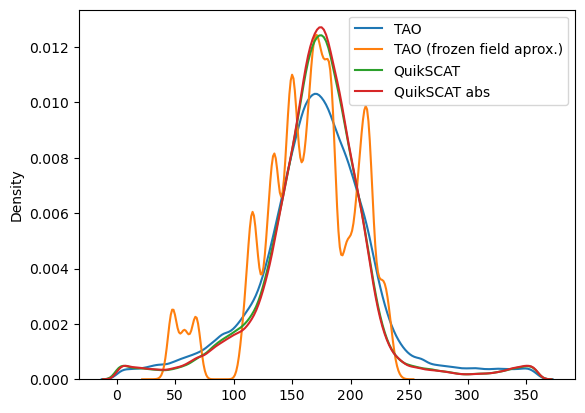

In [22]:
sns.kdeplot(df['WDIR (TAO)'], label = 'TAO',)
sns.kdeplot(df['WDIR_FZ (TAO)'], label = 'TAO (frozen field aprox.)',)
sns.kdeplot(df['WDIR (QuikSCAT)'], label = 'QuikSCAT')
sns.kdeplot(df['WDIR (QuikSCAT) absolute'], label = 'QuikSCAT abs')
plt.legend()

In [68]:
df

<xarray.Dataset>
Dimensions:                                   (count: 264416)
Coordinates:
  * count                                     (count) int64 0 1 ... 295512
Data variables: (12/133)
    WDIR (TAO)                                (count) float32 140.6 ... 143.2
    WDIR_QC                                   (count) float32 2.0 2.0 ... 2.0
    WDIR_DM                                   (count) |S1 b'D' b'D' ... b'D'
    WSPD (TAO)                                (count) float32 6.79 5.46 ... 4.23
    WSPD_QC                                   (count) float32 2.0 2.0 ... 2.0
    WSPD_DM                                   (count) |S1 b'D' b'D' ... b'D'
    ...                                        ...
    WSPD_DIFF_FZ (QuikSCAT - TAO)             (count) float64 0.8534 ... 1.555
    WDIR_DIFF_FZ (QuikSCAT - TAO)             (count) float64 -2.883 ... 60.26
    cos(WDIR_DIFF_FZ (QuikSCAT - TAO))        (count) float64 0.9987 ... 0.4961
    sin(WDIR_DIFF_FZ (QuikSCAT - TAO))        (count) float64 -0.0503 ... 0.8683
    UWND_DIFF (QuikSCAT - TAO)                (count) float64 -0.4626 ... -3.812
    VWND_DIFF (QuikSCAT - TAO)                (count) float64 0.7952 ... 1.854

In [23]:
df.to_netcdf('ZonalFrz_rainFlagRemovedBuoyDataFrozenBadQualityRemovedMatchupAmbuguitiesAdded_waveAndGlorysAdded_manualRemovedSomeData.nc')